# A new statistical method to analyze Morris Water Maze data using Dirichlet distribution

This notebook shows how you can easily reproduce the results presented in our paper and apply the Dirichlet test to your own data using Python. You only have to modify the names of the files to load your own data.

Follow the instructions alongside the code and run the code to obtain your results !

*Remember*: you need to have a working installation of Python (2 or 3) and Jupyter.

### Load modules

In [1]:
import numpy as np
import sys
sys.path.insert(0, '../')
from dirichlet import dirichlet

%matplotlib inline

### Load data
Data must be passed as a numpy 2D array where each row [TQ,AQ1,OQ,AQ2] represents one sample (note that each row will be normalized so that its sum is 1). If your data is in a `.csv` file, you can use `pandas` or `numpy`.

#### With pandas (if this doesn't work, just use numpy)

In [2]:
import pandas as pd
data_3tg = pd.read_csv('3Tg.csv')
data_wt = pd.read_csv('wt.csv')

In [3]:
data_3tg

,TQ,AQ1,OQ,AQ2
0,45.3,15.7,27.6,11.4
1,21.2,21.9,24.4,32.5
2,26.2,31.3,21.5,21.0
3,37.0,24.5,12.3,26.3
4,30.2,32.7,16.8,20.3
5,28.9,20.9,18.8,31.5
6,22.8,30.0,29.1,18.2


In [4]:
# Pandas data frames need to be converted to numpy arrays
data_3tg = data_3tg.to_numpy()
data_wt = data_wt.to_numpy()

#### With numpy

In [5]:
# Load .csv files...
data_3tg = np.loadtxt('3Tg.csv', delimiter=',', skiprows=1)
data_wt = np.loadtxt('wt.csv', delimiter=',', skiprows=1)

# or simple text files ...
data_3tg = np.loadtxt('3Tg.txt')
data_wt = np.loadtxt('wt.txt')

# or create 2d arrays manually
data_3tg = np.array([[45.3, 15.7, 27.6, 11.4],
                     [21.2, 21.9, 24.4, 32.5],
                     [26.2, 31.3, 21.5, 21. ],
                     [37. , 24.5, 12.3, 26.3],
                     [30.2, 32.7, 16.8, 20.3],
                     [28.9, 20.9, 18.8, 31.5],
                     [22.8, 30. , 29.1, 18.2]])
data_wt  = np.array([[44.3, 12.9, 26.2, 16.7],
                     [28.2, 26.3, 27.6, 18. ],
                     [41.1, 15.2, 13.9, 29.9],
                     [57.5, 13.3, 13.2, 16.1],
                     [52.9,  9.3, 10.3, 27.5],
                     [41.9, 35.3, 14.7,  8.1],
                     [30.9, 26.9, 17.4, 24.8]])

`data_3tg` should be a numpy 2D array at this point.

In [6]:
data_3tg

array([[45.3, 15.7, 27.6, 11.4],
       [21.2, 21.9, 24.4, 32.5],
       [26.2, 31.3, 21.5, 21. ],
       [37. , 24.5, 12.3, 26.3],
       [30.2, 32.7, 16.8, 20.3],
       [28.9, 20.9, 18.8, 31.5],
       [22.8, 30. , 29.1, 18.2]])

### Apply the test

You can use the `test_uniform` function separetely. The first output is the $\Lambda$ statistics, with our Bartlett correction if `do_MWM_correction` is set to `True`. The second output is the $p$-value. The third and fourth are the estimated $\alpha_i$ parameters for the best fit (alternative) and the uniformity (null) hypotheses.

In [7]:
stat, pval, alpha_best, alpha_uni = dirichlet.test_uniform(data_3tg, label='3Tg', do_MWM_correction=True, verbose=True)
stat, pval, alpha_best, alpha_uni = dirichlet.test_uniform(data_wt, label='wt', do_MWM_correction=True, verbose=True)


Result of the Dirichlet uniformity test for group 3Tg:
# likelihood-ratio statistic (with MWM correction) = 3.95865
# p-value = 0.265964
# MLE params under null hypothesis (uniformity)           :[8.40402434 8.40402434 8.40402434 8.40402434]
# MLE params under alternative hypothesis                 :[12.55460935 10.6084696   9.02098363  9.49037119]

Result of the Dirichlet uniformity test for group wt:
# likelihood-ratio statistic (with MWM correction) = 14.621
# p-value = 0.00217089
# MLE params under null hypothesis (uniformity)           :[3.01649146 3.01649146 3.01649146 3.01649146]
# MLE params under alternative hypothesis                 :[11.42349023  5.25568502  4.89513099  5.44866848]




Or use the `plot` function to make the plot. If `do_test_uniform` is `True`, then the uniformity test is run. `save_figure` allows you to save to a file.


Result of the Dirichlet uniformity test for group 3Tg:
# likelihood-ratio statistic (with MWM correction) = 3.95865
# p-value = 0.265964
# MLE params under null hypothesis (uniformity)           :[8.40402434 8.40402434 8.40402434 8.40402434]
# MLE params under alternative hypothesis                 :[12.55460935 10.6084696   9.02098363  9.49037119]

Result of the Dirichlet uniformity test for group wt:
# likelihood-ratio statistic (with MWM correction) = 14.621
# p-value = 0.00217089
# MLE params under null hypothesis (uniformity)           :[3.01649146 3.01649146 3.01649146 3.01649146]
# MLE params under alternative hypothesis                 :[11.42349023  5.25568502  4.89513099  5.44866848]


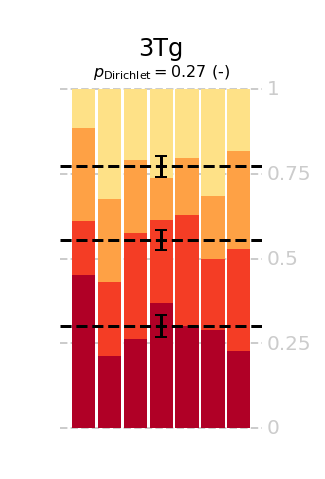

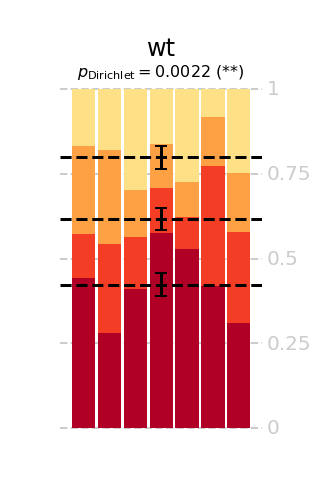

In [8]:
dirichlet.plot(data_3tg, label='3Tg', do_test_uniform=True, do_MWM_correction=True, verbose=True, save_figure='3Tg.png')
dirichlet.plot(data_wt, label='wt', do_test_uniform=True, do_MWM_correction=True, verbose=True, save_figure='wt.png')